In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
A=pd.read_csv('wine.xls',names = 
              ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
A.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [100]:
A.Cultivator.value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [5]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


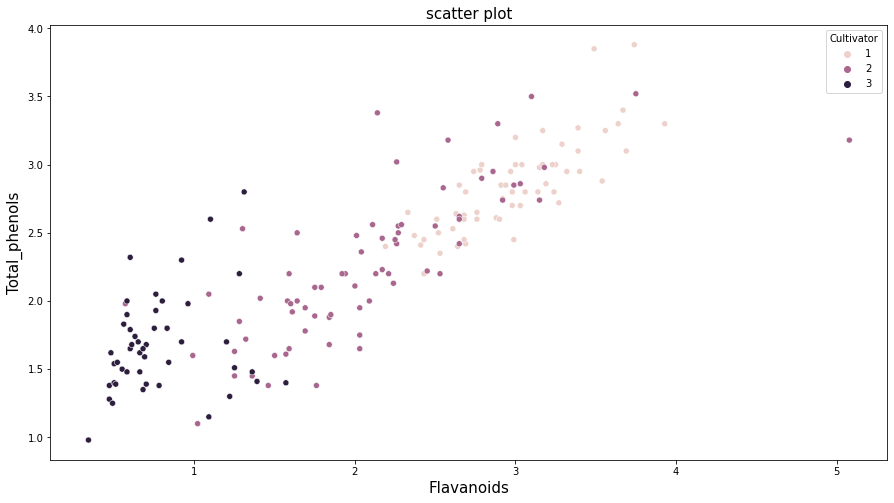

In [6]:
# plot the scatterplot to visualize the clusters
plt.rcParams['figure.figsize'] = [15,8]
sns.scatterplot(x = 'Flavanoids', y = 'Total_phenols', data = A, hue = 'Cultivator')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('scatter plot', fontsize = 15)
plt.xlabel('Flavanoids', fontsize = 15)
plt.ylabel('Total_phenols', fontsize = 15)

# display the plot
plt.show()

In [7]:
A.shape

(178, 14)

In [8]:
A['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [9]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [10]:
from scipy.stats import f_oneway

In [11]:
g1=A[A['Cultivator']==1]
g2=A[A['Cultivator']==2]
g3=A[A['Cultivator']==3]

In [12]:
g1.shape,g2.shape,g3.shape

((59, 14), (71, 14), (48, 14))

In [13]:
A['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [14]:
f_oneway(g1['Ash'],g2['Ash'],g3['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

In [15]:
f_oneway(g1['Magnesium'],g2['Magnesium'],g3['Magnesium'])


F_onewayResult(statistic=12.4295843381499, pvalue=8.963395439251042e-06)

In [16]:
p_val=[]
for col in A.columns:
    res=f_oneway(g1[col],g2[col],g3[col])
    p_val.append(res[1])
print(p_val)

[0.0, 3.319503795619655e-36, 4.127228798041834e-14, 4.149967974793239e-06, 9.444472938826817e-14, 8.963395439251042e-06, 2.1376700154385954e-28, 3.5985858307136404e-50, 3.88804090047893e-11, 5.125358737546706e-12, 1.162008021927618e-33, 5.9176622163620664e-30, 1.393104956942896e-44, 5.783168356105498e-47]


In [17]:
X=A.drop('Cultivator',axis=1)
Y=A['Cultivator']

In [18]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [19]:
LR=LogisticRegression()
NB=GaussianNB()

In [20]:
from sklearn.model_selection import cross_val_score,KFold,train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [22]:
ytest.value_counts()

2    22
1    19
3    13
Name: Cultivator, dtype: int64

In [23]:
LR.fit(xtrain,ytrain)
y_prob=LR.predict_proba(xtest)
y_prob[:10]

array([[9.91163644e-01, 1.25110900e-03, 7.58524741e-03],
       [2.40941697e-06, 9.36228711e-08, 9.99997497e-01],
       [6.71240309e-03, 9.91792088e-01, 1.49550884e-03],
       [9.85707462e-01, 2.01636637e-03, 1.22761718e-02],
       [4.69719565e-03, 9.93612018e-01, 1.69078611e-03],
       [7.80088388e-04, 9.92166101e-01, 7.05381035e-03],
       [9.99367919e-01, 1.30257074e-04, 5.01824063e-04],
       [7.53967537e-04, 5.68179601e-05, 9.99189215e-01],
       [1.56353769e-02, 9.81848996e-01, 2.51562757e-03],
       [4.08645716e-03, 9.94372493e-01, 1.54105004e-03]])

In [24]:
y_class=LR.predict(xtest)
y_class[:10]

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2], dtype=int64)

In [25]:
from sklearn import metrics

In [26]:
cm=metrics.confusion_matrix(ytest,y_class)
print(cm)

[[17  2  0]
 [ 0 21  1]
 [ 0  0 13]]


In [27]:
cr=metrics.classification_report(ytest,y_class)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [28]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9658192090395481, 0.05920286658639382)

In [29]:
score

array([1.        , 0.89745763, 1.        ])

In [30]:
1-.943

0.05700000000000005

In [31]:
score

array([1.        , 0.89745763, 1.        ])

In [32]:
NB.fit(xtrain,ytrain)
y_prob=NB.predict_proba(xtest)
y_prob[:10]

array([[9.99999998e-01, 2.06943921e-09, 1.71880603e-29],
       [3.41006589e-22, 4.31658902e-26, 1.00000000e+00],
       [1.35567177e-02, 9.86443282e-01, 2.19527861e-32],
       [1.00000000e+00, 1.82933294e-10, 1.73174421e-30],
       [3.98883079e-08, 9.99999960e-01, 1.61611888e-17],
       [7.31736779e-06, 9.99992683e-01, 7.45625321e-64],
       [1.00000000e+00, 2.39877025e-10, 4.18718403e-34],
       [7.62131635e-23, 5.70973815e-13, 1.00000000e+00],
       [4.64976182e-09, 9.99999995e-01, 4.18584637e-16],
       [2.10139045e-14, 9.99999828e-01, 1.71825557e-07]])

In [33]:
y_class=NB.predict(xtest)
y_class[:10]

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2], dtype=int64)

In [34]:
cm=metrics.confusion_matrix(ytest,y_class)
print(cm)

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


In [35]:
cr=metrics.classification_report(ytest,y_class)
print(cr)

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [36]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(NB,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9490931320063195, 0.00031152756735189824)

In [37]:
score

array([0.94937951, 0.94876142, 0.94913847])

In [38]:
X_std.shape

(178, 13)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [41]:
GS.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [42]:
knn_tuned=KNeighborsClassifier(n_neighbors=13,weights='uniform')

In [43]:
score=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
print(np.mean(score))
print(np.std(score,ddof=1))

0.9771099712558232
0.039646692771626336


In [44]:
score

array([1.        , 0.93132991, 1.        ])

In [45]:
score

array([1.        , 0.93132991, 1.        ])

In [46]:
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [47]:
dt_predict_train=DT.predict(xtrain)
dt_predict_test=DT.predict(xtest)

In [48]:
from sklearn import metrics

In [49]:
cm_dt_train=metrics.confusion_matrix(ytrain,dt_predict_train)
print(cm_dt_train)

[[40  0  0]
 [ 0 49  0]
 [ 0  0 35]]


In [50]:
cr_dt_train=metrics.classification_report(ytrain,dt_predict_train)
print(cr_dt_train)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        35

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [51]:
cm_dt_test=metrics.confusion_matrix(ytest,dt_predict_test)
print(cm_dt_test)

[[18  1  0]
 [ 5 16  1]
 [ 0  0 13]]


In [52]:
cr_dt_test=metrics.classification_report(ytest,dt_predict_test)
print(cr_dt_test)

              precision    recall  f1-score   support

           1       0.78      0.95      0.86        19
           2       0.94      0.73      0.82        22
           3       0.93      1.00      0.96        13

    accuracy                           0.87        54
   macro avg       0.88      0.89      0.88        54
weighted avg       0.88      0.87      0.87        54



In [53]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
train_char_label = ['cult1', 'cult2','cult3']
DT_Tree_File = open('Wine_tree.dot','w')
dot_data = tree.export_graphviz(DT, out_file=DT_Tree_File, feature_names = list(xtrain), class_names = list(train_char_label))

DT_Tree_File.close()

In [54]:
print (pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = X.columns))

                           Imp
Alchol                0.000000
Malic_Acid            0.000000
Ash                   0.023891
Alcalinity_of_Ash     0.000000
Magnesium             0.000000
Total_phenols         0.020361
Flavanoids            0.417538
Nonflavanoid_phenols  0.000000
Proanthocyanins       0.000000
Color_intensity       0.406217
Hue                   0.000000
OD280                 0.000000
Proline               0.131994


In [55]:
X['Hue'].std()

0.22857156582982338

In [56]:
np.std(X['Hue'],ddof=1)

0.22857156582982338

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
DT_be=[]
DT_ve=[]
for i in np.arange(1,10):
  DT=DecisionTreeClassifier(max_depth=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(DT,X,Y,scoring='f1_weighted')
  DT_be.append(np.mean(1-scores))
  DT_ve.append(np.std(scores,ddof=1))

In [59]:
np.argmin(DT_ve),np.min(DT_ve)

(3, 0.04505939965705464)

In [60]:
DT_tuned=DecisionTreeClassifier(max_depth=3,random_state=0)

In [61]:
RF_be=[]
RF_ve=[]
for i in np.arange(1,100):
  RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(RF,X,Y,scoring='f1_weighted')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

In [62]:
np.argmin(RF_ve),np.min(RF_ve)

(60, 0.012680068860603404)

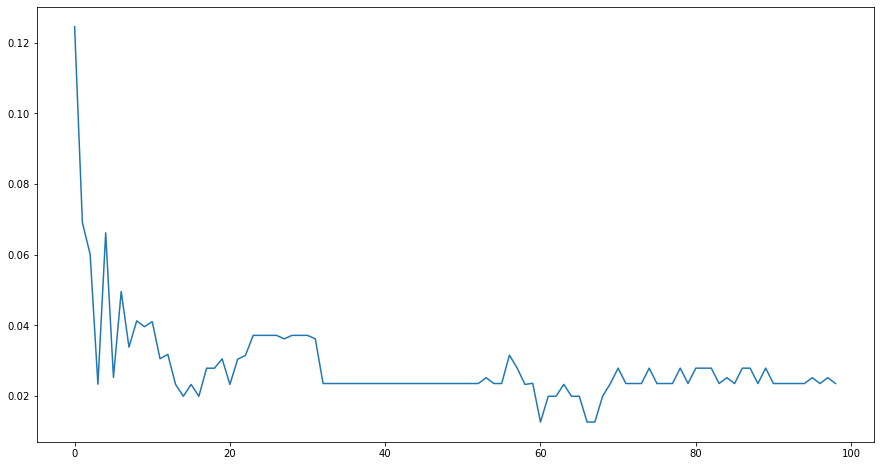

In [63]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [64]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(DT_tuned,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.8989238426456877, 0.051281209503105)

In [65]:
RF_tuned=RandomForestClassifier(criterion='entropy',n_estimators=66,random_state=0)

In [66]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(RF_tuned,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9774145441948994, 0.02607119635442501)

In [67]:
1-.977

0.02300000000000002

In [68]:
score

array([0.98335928, 0.94888435, 1.        ])

In [69]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [70]:
Ab=AdaBoostClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [71]:
GS.best_params_

{'n_estimators': 3}

In [72]:
Ab_dt=AdaBoostClassifier(n_estimators=3,random_state=0)

In [73]:
score=cross_val_score(Ab_dt,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9153403119017756, 0.034140888087396355)

In [74]:
#Let us boost the NB model
Ab=AdaBoostClassifier(base_estimator=LR,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [75]:
GS.best_params_

{'n_estimators': 11}

* n_estimator=1 indicates there is no scope for boosting

In [76]:
Ab_NB=AdaBoostClassifier(n_estimators=3,random_state=0)

In [77]:
Ab_LR=AdaBoostClassifier(base_estimator=LR,n_estimators=11,random_state=0)

In [78]:
score=cross_val_score(Ab_dt,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.8619741400982708, 0.09046354866767242)

In [79]:
score=cross_val_score(Ab_LR,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9498095023205563, 0.032823439712756274)

In [80]:
#Let us boost the RF model
Ab=AdaBoostClassifier(base_estimator=RF_tuned,random_state=0)
params={'n_estimators':np.arange(1,50)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                                                n_estimators=66,
                                                                                random_state=0),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_weighted')

In [81]:
GS.best_params_

{'n_estimators': 1}

no scope for boosting Rf

In [82]:
GB=GradientBoostingClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(GB,params,cv=kf,scoring='f1_weighted')
GS.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [83]:
GS.best_params_

{'n_estimators': 14}

In [85]:
from xgboost import XGBClassifier

In [88]:
xgb = XGBClassifier(gamma=2,learning_rate=0.1)

xgb.fit(X,Y)

[17:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [94]:
GB_tuned=GradientBoostingClassifier(n_estimators=58,random_state=0)

In [95]:
from sklearn.ensemble import VotingClassifier
Stacked = VotingClassifier(estimators = [('BoostedLR',Ab_LR),
                                         ('RandomForest', RF_tuned), 
                                         ('GBoost',GB_tuned)],voting='soft')

In [97]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',knn_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))
models.append(('BoostedDT',Ab_dt))
models.append(('BoostedLR',Ab_LR))
models.append(('BoostedNB',Ab_NB))
models.append(('GBoost',GB_tuned))
models.append(('Stacked',Stacked))
models.append(('BoostedXGB',xgb))

Logistic: 0.965819 (0.059203)
NaiveBayes: 0.949093 (0.000312)
KNN: 0.977110 (0.039647)
DecisionTree: 0.898924 (0.051281)
RandomForest: 0.977415 (0.026071)
BoostedDT: 0.909769 (0.042723)
BoostedLR: 0.977268 (0.026103)
BoostedNB: 0.909769 (0.042723)
GBoost: 0.938274 (0.025709)
Stacked: 0.977589 (0.009764)
[17:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

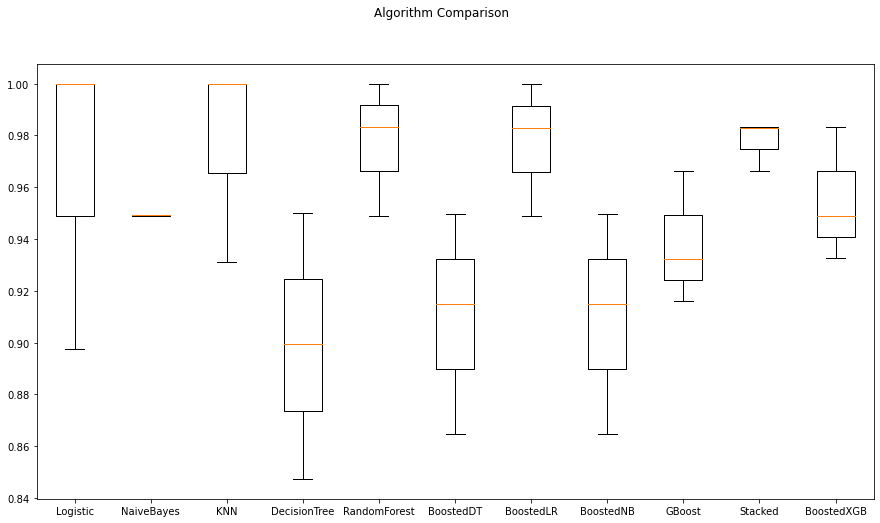

In [98]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_std, Y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()